# Exploratory Data Analysis - Temperature Data Viewer

## Open the menu item Cell and click Run All to see a summary of the data feed passed into this notebook from the URL.

In [11]:
%%javascript
function getQueryStringValue (key)
{  
    return unescape(window.location.search.replace(new RegExp("^(?:.*[&\\?]" + escape(key).replace(/[\.\+\*]/g, "\\$&") + "(?:\\=([^&]*))?)?.*$", "i"), "$1"));
}
IPython.notebook.kernel.execute("DATA='".concat(getQueryStringValue("DATA")).concat("'"));

<IPython.core.display.Javascript object>

Load libraries for charting

In [12]:
%run DataViewerHelper.py

Get chart data and review head to see features (and those we have enhanced)

In [13]:
df = get_data(DATA)
df.head(10)

,temperature,temperature_lag1,temperature_lag2,temperature_lag7,temperature_lag30,temperature_lag90,temperature_lag365,temperature_mavg7,temperature_mavg30,temperature_mavg60,temperature_mavg90,temperature_mavg180,clean_ao_value,clean_nao_value,clean_nino3_value,clean_nino4_value,clean_nino12_value,clean_nino34_value
datetime,,,,,,,,,,,,,,,,,,
2013-10-01,13.435553,12.082927,13.775979,11.581382,22.374375,24.321125,14.204333,13.418761,17.882211,19.420925,20.860935,17.920171,-0.497,-0.726,-0.1,-0.05,-0.16,-0.24
2013-10-02,17.426121,13.435553,12.082927,12.606729,23.005167,24.445833,15.863090,14.107246,17.696243,19.352180,20.782938,17.991875,-0.561,-0.657,-0.1,-0.05,-0.16,-0.24
2013-10-03,18.405358,17.426121,13.435553,14.247764,21.077704,27.494375,15.870833,14.701187,17.607165,19.306616,20.681949,18.051812,-0.485,-0.657,-0.1,-0.05,-0.16,-0.24
2013-10-04,13.742917,18.405358,17.426121,14.693125,20.946385,28.105375,16.893750,14.565443,17.367049,19.190891,20.522366,18.102896,0.457,-0.651,-0.1,-0.05,-0.16,-0.24
2013-10-05,17.659250,13.742917,18.405358,13.089250,18.253493,27.980833,16.367292,15.218301,17.347241,19.175545,20.407682,18.176443,1.106,-0.330,-0.1,-0.05,-0.16,-0.24
2013-10-06,17.948667,17.659250,13.742917,13.775979,19.216074,26.404583,17.998958,15.814399,17.304994,19.190334,20.313727,18.215986,1.360,-0.072,-0.1,-0.05,-0.16,-0.24
2013-10-07,18.860583,17.948667,17.659250,12.082927,18.642200,25.204167,18.042917,16.782635,17.312273,19.185328,20.243243,18.248230,0.791,-0.140,-0.1,-0.05,-0.16,-0.24
2013-10-08,16.668610,18.860583,17.948667,13.435553,19.479515,20.030417,10.657917,17.244501,17.218577,19.084884,20.205890,18.279986,0.247,0.111,-0.1,-0.05,-0.16,-0.24
2013-10-09,17.186250,16.668610,18.860583,17.426121,13.941667,22.366250,9.864375,17.210233,17.326729,18.984527,20.148334,18.326713,0.529,0.282,-0.1,-0.05,-0.16,-0.24


Lets now plot the time series

In [14]:
fig = chart(f'{DATA} time series', df)
iplot(fig)

Lets review multiple years and examine the observed, trends, seasonality and residuals using decomposition with additive differencing.

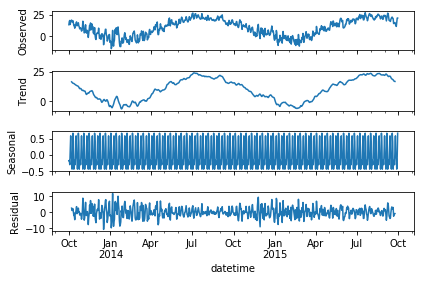

In [15]:
dsd = seasonal_decompose(df[:730]['temperature'], model='additive',freq=12)
dsd.plot()
plt.show()

Lets zoom in an review a single calendar year

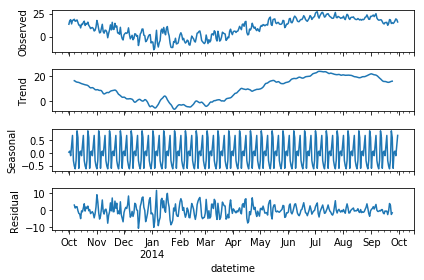

In [17]:
dsd = seasonal_decompose(df[:365]['temperature'], model='additive',freq=12)
dsd.plot()
plt.show()

We can see each temperature time series has a well structured oscillating trend pattern coinciding with the seasonal patterns.